In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ML_ECommerce.csv to ML_ECommerce.csv


In [ ]:
import pandas as pd
df = pd.read_csv('ML_ECommerce.csv')
df

,Region,return_flag,num_products,total_quantity,avg_unit_price,avg_rating,sales_target,order_year,order_month,order_day_week,order_day,order_day_year,avg_session_duration,num_sessions,min_category_id_in_order,has_active_discount,avg_discount_percentage,total_quantity_in_order
0,North Carolina,0,1,3,173.95,2,521.85,2025,4,7,5,95,4048,15,6,0,0.00,3
1,Armed Forces Americas,0,2,8,64.83,2,436.91,2025,3,4,5,64,3034,19,4,0,0.00,8
2,Idaho,0,5,16,502.44,2,7711.55,2025,4,2,21,111,2380,3,4,0,0.00,16
3,Indiana,0,4,13,533.11,3,7952.82,2025,4,3,15,105,4333,9,4,0,0.00,13
4,Vermont,0,3,6,563.53,3,2785.65,2025,2,3,11,42,3600,5,1,0,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,Alaska,0,2,6,462.15,2,2530.16,2025,1,3,7,7,3621,22,4,0,0.00,6
10196,Nevada,0,2,6,324.27,3,1488.94,2025,4,4,23,113,3920,29,3,0,0.00,6
10197,Hawaii,0,3,7,505.89,3,3672.56,2025,2,3,11,42,3137,35,10,0,0.00,7
10198,New Jersey,0,5,12,576.30,3,7032.61,2025,1,2,13,13,3514,50,7,0,0.00,12


In [ ]:
X = df.drop(['sales_target'], axis=1)
y = df['sales_target']

# لو في أعمدة مش رقمية، هنعملها encoding:
X = pd.get_dummies(X, drop_first=True)

# تقسيم البيانات
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 7140, number of used features: 15
[LightGBM] [Info] Start training from score 4403.461981


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.96,0.96,590.92,1.42
HistGradientBoostingRegressor,0.96,0.96,595.78,0.38
LGBMRegressor,0.96,0.96,598.35,0.25
RandomForestRegressor,0.95,0.95,614.63,5.95
ExtraTreesRegressor,0.95,0.95,623.80,3.22
XGBRegressor,0.95,0.95,633.01,0.36
BaggingRegressor,0.95,0.95,641.63,0.57
AdaBoostRegressor,0.92,0.92,826.20,0.74
DecisionTreeRegressor,0.91,0.92,841.04,0.12


Training time: 0.0669 seconds
Prediction time for 5 months: 0.0112 seconds

MAE: 82.71
MSE: 9184.71
RMSE: 95.84
R²: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.w

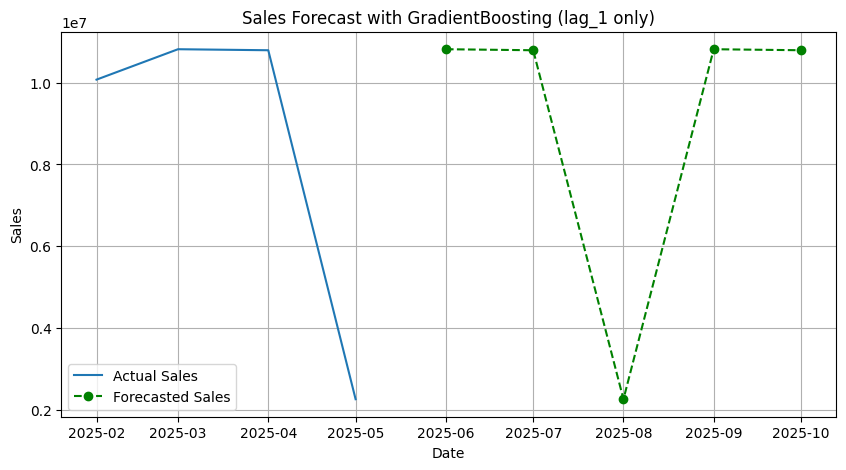

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# 1. تحميل البيانات
df = pd.read_csv("ML_ECommerce.csv")

# 2. تحويل السنة والشهر لتاريخ
df['OrderDate'] = pd.to_datetime(df[['order_year', 'order_month']].rename(columns={
    'order_year': 'year', 'order_month': 'month'
}).assign(day=1))

# 3. ترتيب وتجميع المبيعات شهرياً
df = df.sort_values('OrderDate')
monthly_sales = df.groupby('OrderDate')['sales_target'].sum().reset_index()

# 4. إنشاء lag_1 فقط
monthly_sales['lag_1'] = monthly_sales['sales_target'].shift(1)
monthly_sales = monthly_sales.dropna().reset_index(drop=True)

# 5. تجهيز البيانات
X = monthly_sales[['lag_1']]
y = monthly_sales['sales_target']

# 6. تدريب الموديل مع قياس الوقت
start_train = time.time()
model = GradientBoostingRegressor()
model.fit(X, y)
end_train = time.time()
print(f"Training time: {end_train - start_train:.4f} seconds")

# 7. التنبؤ بـ 5 شهور قادمة مع قياس الوقت
start_pred = time.time()
future_predictions = []
last_known = monthly_sales.copy()

for i in range(5):
    next_date = last_known['OrderDate'].max() + pd.DateOffset(months=1)
    lag_1 = last_known.iloc[-1]['sales_target']

    input_row = [[lag_1]]
    pred = model.predict(input_row)[0]

    future_predictions.append({'OrderDate': next_date, 'Forecasted_Sales': pred})

    # تحديث البيانات
    last_known = pd.concat([last_known, pd.DataFrame([{
        'OrderDate': next_date,
        'sales_target': pred,
        'lag_1': lag_1
    }])], ignore_index=True)
end_pred = time.time()
print(f"Prediction time for 5 months: {end_pred - start_pred:.4f} seconds")

# 8. حساب مقاييس الأداء على بيانات التدريب الأصلية
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"\nMAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# 9. رسم النتائج
future_df = pd.DataFrame(future_predictions)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['OrderDate'], monthly_sales['sales_target'], label='Actual Sales')
plt.plot(future_df['OrderDate'], future_df['Forecasted_Sales'], '--o', color='green', label='Forecasted Sales')
plt.title('Sales Forecast with GradientBoosting (lag_1 only)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()